In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
boston_data=load_boston()
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
boston =pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston['price']=boston_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#data preprocessing

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [9]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# EDA (exploratory data analysis)

<AxesSubplot:xlabel='price', ylabel='Density'>

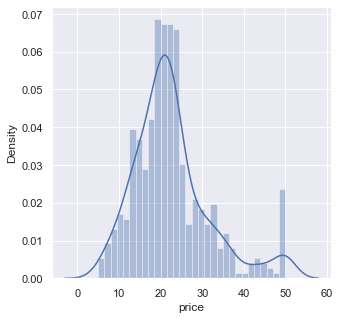

In [22]:
import seaborn as sns
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(boston['price'],bins=30)

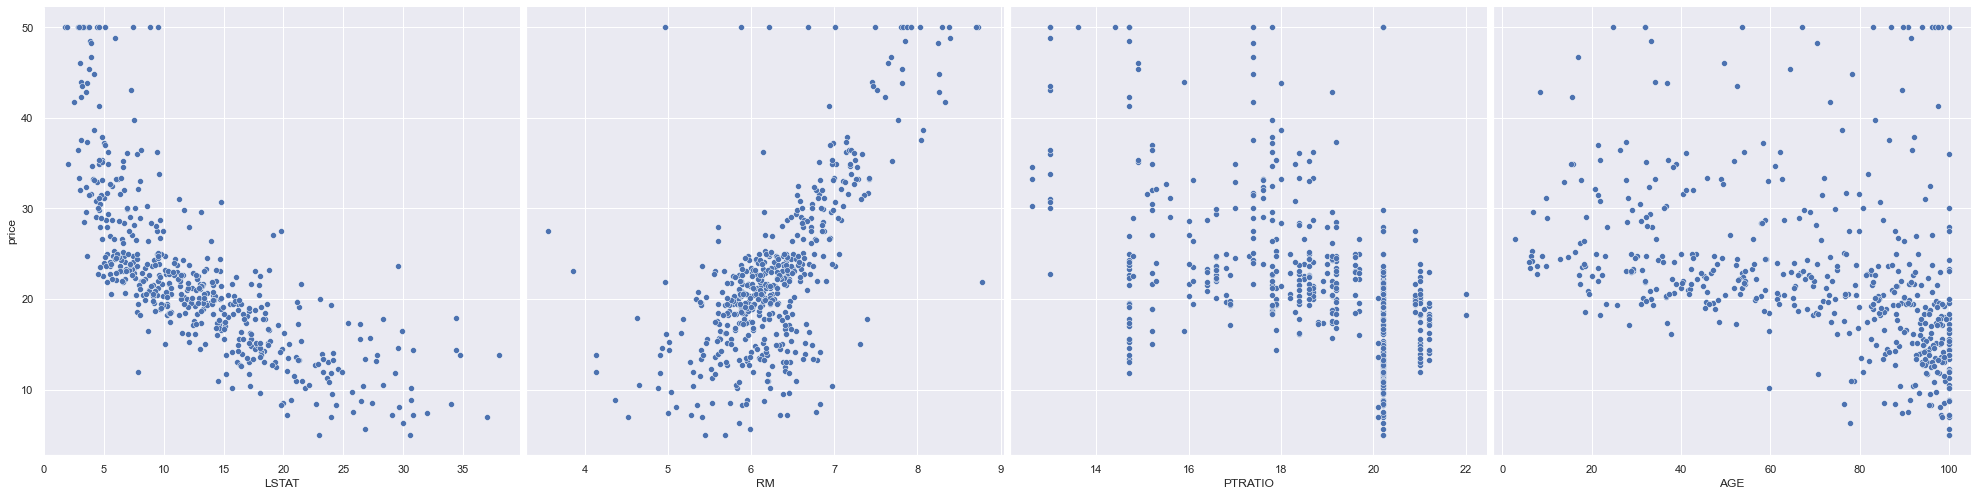

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(boston,x_vars=['LSTAT','RM','PTRATIO','AGE'],y_vars='price',height=7,kind='scatter')

<AxesSubplot:>

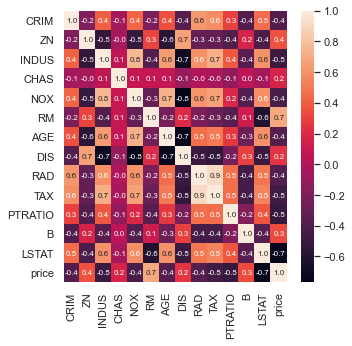

In [28]:
correlation_matrix=boston.corr()
sns.heatmap(data=correlation_matrix, annot=True,annot_kws={"size": 8},fmt='.1f')
#sns.heatmap(data=correlation_matrix,annot=True,annot_kws={"size":10},fmt='.1f')

# Preparing the data for model training


In [33]:
X = pd.DataFrame(np.c_[boston["LSTAT"],boston["RM"],boston["PTRATIO"]],columns=['LSTAT','RM','PTRATIO'])
y = boston['price']

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
X_train.shape

(354, 3)

In [37]:
lr=LinearRegression()

In [38]:
##Training the model

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
print('Intercept: \n',lr.intercept_)
print("Cofficients: \n ",lr.coef_)

Intercept: 
 25.37348446418222
Cofficients: 
  [-0.60681801  3.52839125 -0.93396631]


In [44]:
#y=c+m1x1+m2X2+m3X3  ** x1,x2,x3 are independent value


In [46]:
predicted=lr.predict(X_test)
predicted

array([27.78511639, 28.20483188, 18.52350809, 23.54617906, 19.24312332,
       21.30849142, 27.98252064, 19.27167672, 20.17971449, 26.0445041 ,
       25.62723451, 30.39240782, 20.71130123, 24.54161057, 22.32809773,
       18.93388062, 15.86518777, 37.09811693, 28.87746875, 11.10569904,
       21.33956928, 21.39844573, 25.72817853, 25.98864841, 29.69636771,
       12.51046844, 14.9265866 , 22.64486913, 35.35992586, 12.87323824,
       28.16375613, 16.10950036, 38.24363914, 18.58725055, 25.75191392,
       20.10392105, 18.08560145, 29.89138672,  6.94471554, 18.98981525,
       27.48071139, 24.6754922 , 27.86154706, 13.62499774, 17.38953609,
       16.78606525, 38.00759766, 17.35752976, 27.21801001, 22.00245905,
       24.06003788, 25.49465717, 27.43434836, 27.20440406,  6.5604996 ,
       25.66975684,  8.96917471, 26.16054387, 17.99323527, 35.82418216,
       20.01347473, 27.52582009, 14.69721467, 18.20132289,  9.16589222,
       30.31869229, 37.03982803, 28.35012309, 25.32121918, 25.23

In [47]:
new_values=[[0.6,0.5,0.4]]   #self assumed independent value

In [49]:
predicted_new=lr.predict(new_values)
predicted_new

array([26.40000276])

In [50]:
#evalution of the model

In [51]:
test_rm=(np.sqrt(mean_squared_error(y_test,predicted)))
test_r2=r2_score(y_test,predicted)
print(test_rm)
print(test_r2)

5.039931488838316
0.7228623473287102


In [52]:
#visualisation

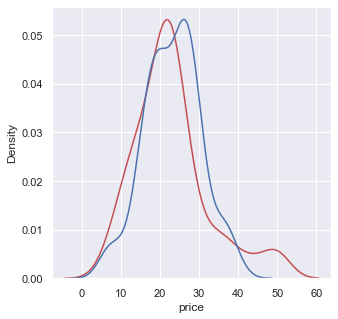

In [56]:
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color="r")
sns.distplot(predicted, hist=False, color="b",ax=ax1)
plt.show()